In [30]:
import pandas as pd
import numpy as np

## Load Dataset

In [31]:
df = pd.read_csv('data.csv')
df.sample()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
515,916221,B,11.34,18.61,72.76,391.2,0.1049,0.08499,0.04302,0.02594,...,12.47,23.03,79.15,478.6,0.1483,0.1574,0.1624,0.08542,0.306,0.06783


In [32]:
df = df.drop(['id'], axis=1)

In [33]:
numerical = []
catgols = []

for col in df.columns:
    if df[col].dtype == "float64":
        numerical.append(col)
    else:
        catgols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [34]:
numerical

['Radius_mean',
 'Texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [35]:
catgols

['diagnosis']

In [36]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [37]:
ind_col = [col for col in df.columns if col != 'diagnosis']
dep_col = 'diagnosis'

In [38]:
df[dep_col].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Transformasi Dataset

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgols:
    df[col] = le.fit_transform(df[col])

In [40]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [41]:
x = df[ind_col]
y = df[dep_col]

In [42]:
df.head()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
df.to_csv('breast_cancer.csv')

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Membuat Model Decision Tree

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0, class_weight=None, criterion='entropy', max_depth=4, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0, random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Akurasi data training : {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi data testing : {dtc_acc} \n")

print(f"Confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()

print(f"Classification report : \n{classification_report(y_test, dtc.predict(x_test))}")

Akurasi data training : 0.9846153846153847
Akurasi data testing : 0.9385964912280702 

Confusion matrix : 
[[62  5]
 [ 2 45]]

Classification report : 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.90      0.96      0.93        47

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



## Simulasi model

In [46]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 1):
    print("Pasien terdiagnosis kanker payudara ganas")
else:
    print("Pasien terdiagnosis kanker payudara jinak")

[1]
Pasien terdiagnosis kanker payudara ganas


/home/ijuldev/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


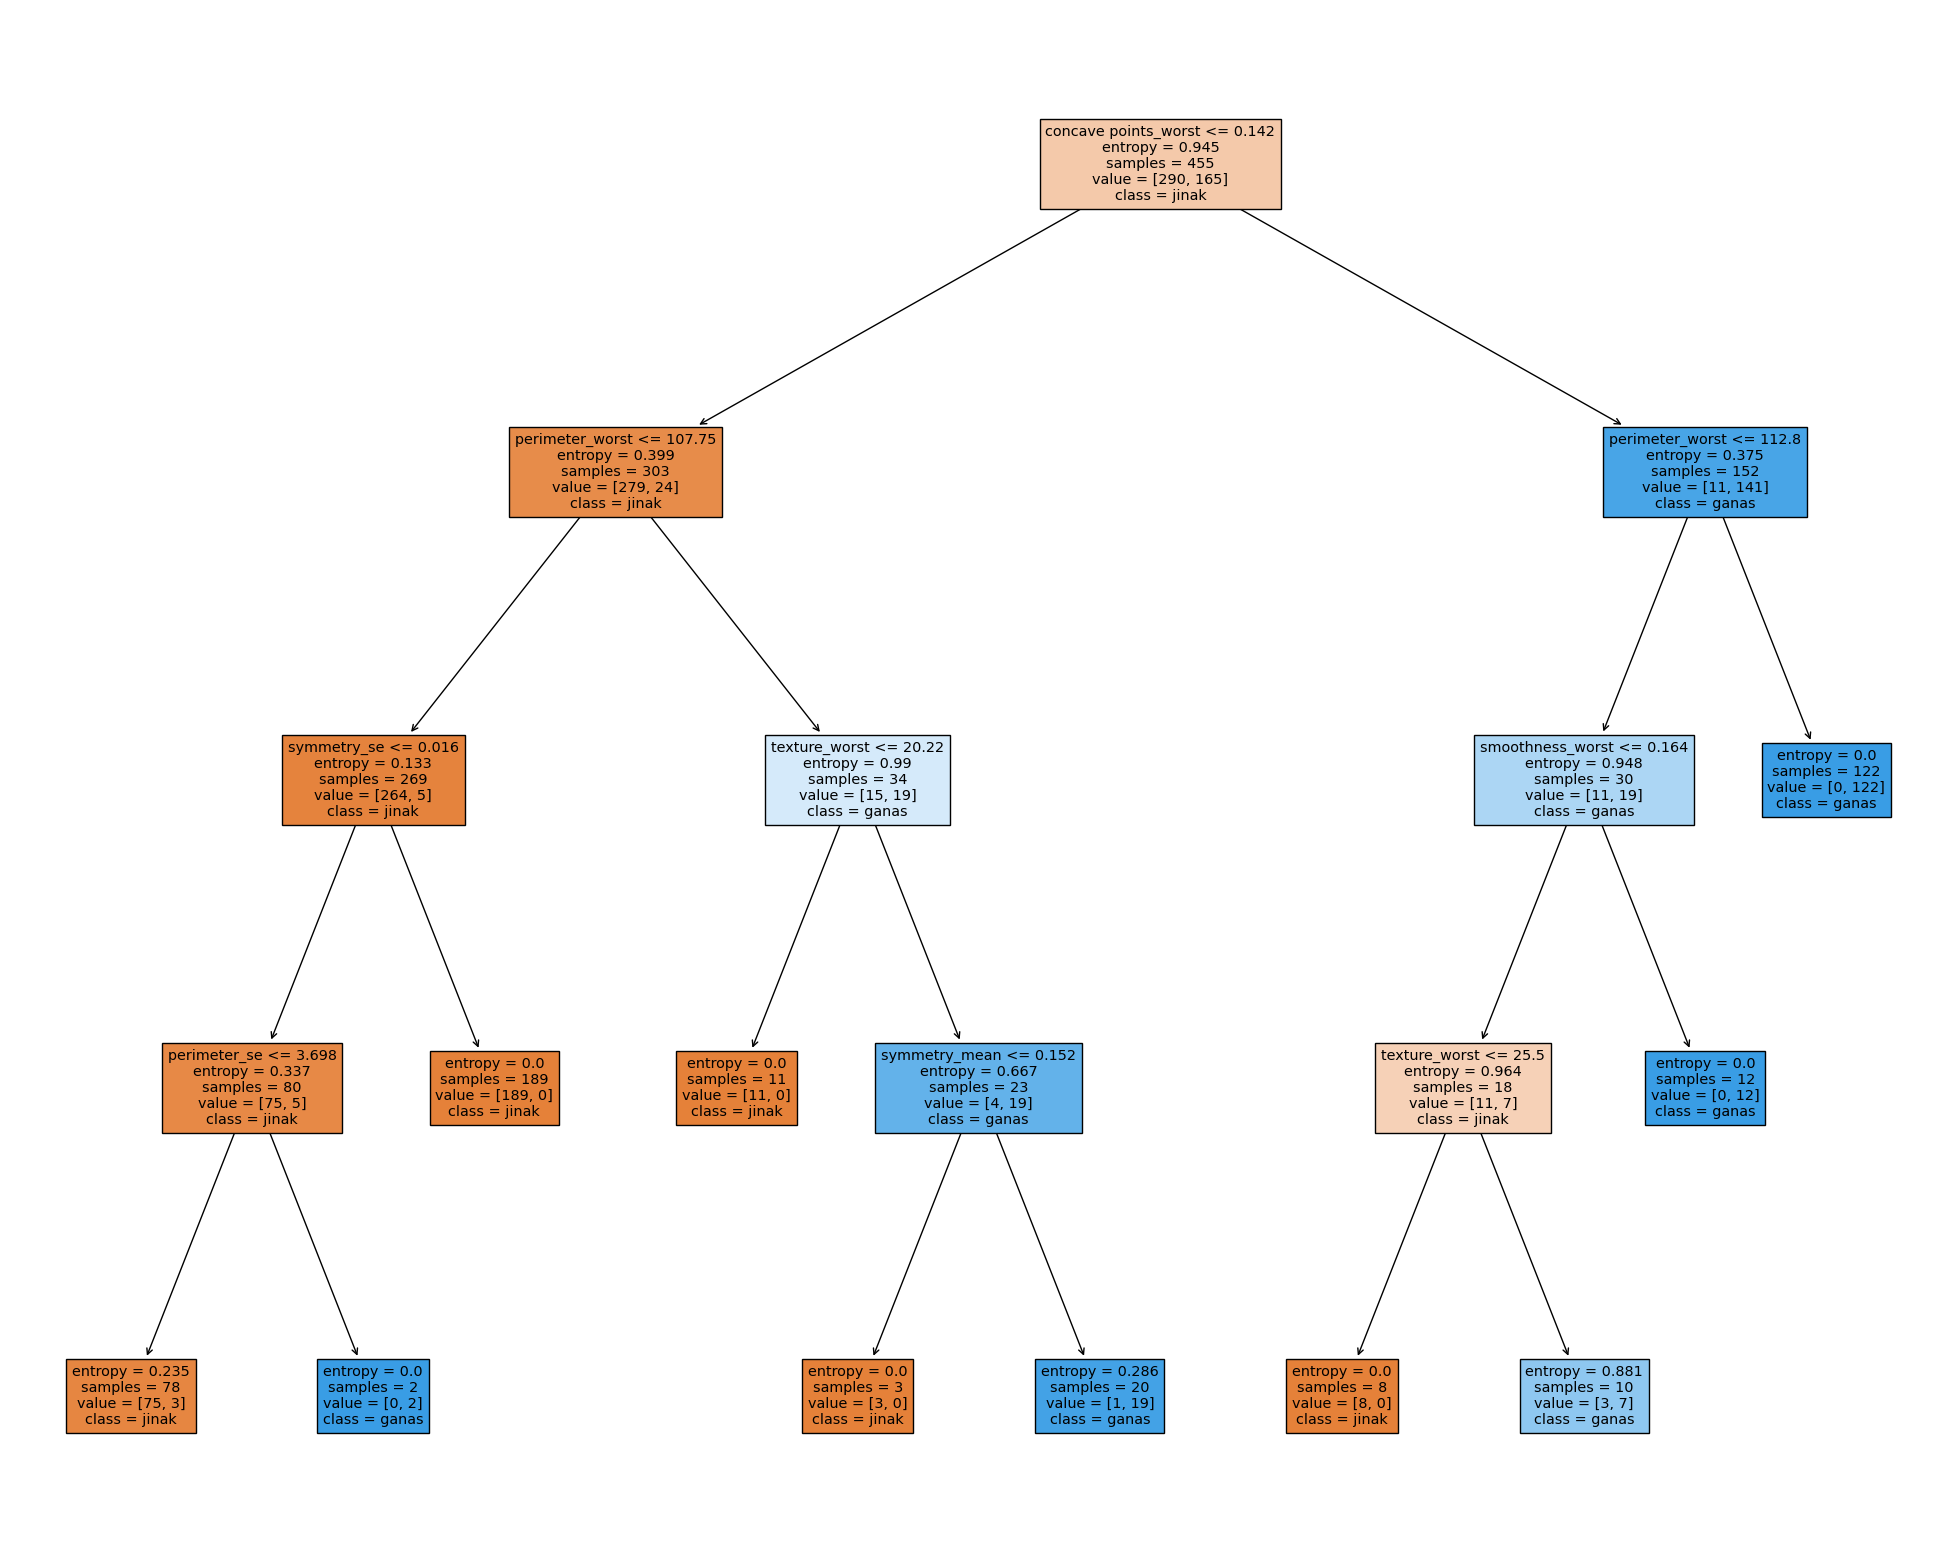

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(model, feature_names=ind_col, class_names=['jinak','ganas'], filled=True)

In [49]:
import pickle

filename = 'breast_cancer.sav'
pickle.dump(model, open(filename, 'wb'))